In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

src : https://www.kaggle.com/kandij/diabetes-dataset

In [2]:
data = pd.read_csv('./diabetes2.csv')
data.shape

(768, 9)

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

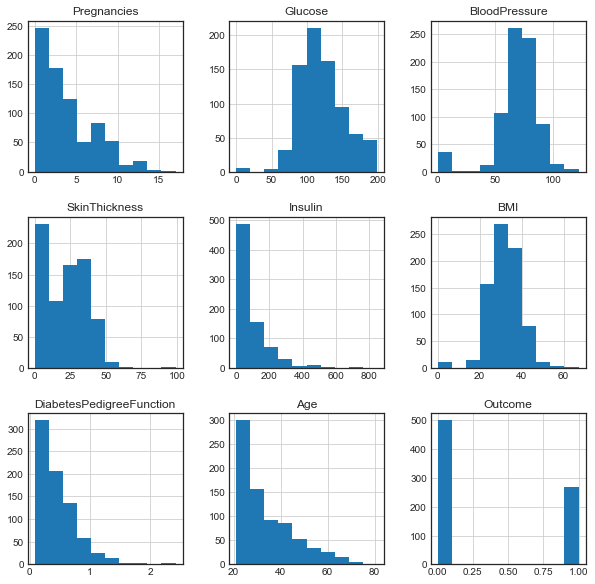

In [4]:
data.hist(figsize=(10,10))

In [5]:
data.corr(method='pearson')['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [6]:
data.Outcome.unique()

array([1, 0], dtype=int64)

In [7]:
x = np.array(data.iloc[:,:-1].values)
#x = np.hstack((np.ones((data.shape[0],1)), x)) #for theta0 x0=1
y = np.array(data['Outcome'])

In [8]:
def normalize(x):
    return x/np.max(x, axis=0),np.max(x, axis=0)
x,temp_max = normalize(x)

In [9]:
x[0],y[0]

(array([0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.25909091, 0.61728395]),
 1)

In [10]:
n=len(x[0])-1
n

7

In [11]:
m=len(x)
m

768

In [12]:
def sigmoid(x):
    return 1/(1+np.e**(-x))

In [13]:
def logistic_regression(x, y, theta, lr, itr):
    cost_plot = np.zeros(itr)
    for i in range(itr):
        y_cap = sigmoid(np.dot(x, theta))
        cost = y * np.log(y_cap) + (1 - y)*np.log(1 - y_cap)
        cost = -1*(np.sum(cost) / m)
        cost_plot[i] = cost
        updated_theta = lr * np.dot(x.T,(y_cap - y)) / m
        theta = theta - updated_theta
    plt.plot(range(1, itr + 1), cost_plot)
    plt.grid()
    plt.xlabel("iterations")
    plt.ylabel("cost")
    return theta

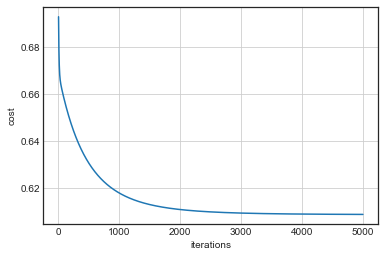

In [14]:
theta = np.zeros(n+1)
itr = 5000
theta = logistic_regression(x, y, theta, 0.2 ,itr)

In [15]:
y_pred = sigmoid(np.dot(x, theta))

In [16]:
count=0
for i in range(len(y)):
    if(y_pred[i]>0.5 and y[i] == 1):
        count+=1
        continue
    if(y_pred[i]<=0.5 and y[i] == 0):
        count+=1        
print(count/len(y))

0.69140625


In [21]:
theta

array([ 2.07826746,  2.43421778, -3.62649312, -0.02572106,  0.7349827 ,
       -0.33453605,  0.7574637 , -1.07804988])

In [17]:
def lr_r(x, y, theta, lr, itr , lambda_value):
    cost_plot = np.zeros(itr)
    theta_0 = theta[0]
    theta_1_n = theta[1:]
    for i in range(itr):
        y_cap = sigmoid(np.dot(x, theta))
        e = y_cap - y
        cost = y * np.log(y_cap) + (1 - y)*np.log(1 - y_cap)
        cost = -1*(np.sum(cost) / m)
        cost_plot[i] = cost

        updated_theta = lr * np.dot(x.T,(y_cap - y)) / m
        updated_theta_0 = (lr / m) * np.dot(x[:,0],(y_cap - y)) 
        updated_theta_1_n = (lr / m) * ( (np.dot(x[:,1:].T,(y_cap - y))) + ((lambda_value/m) * theta_1_n**2) )
        theta = theta - np.hstack((updated_theta_0, updated_theta_1_n))
        
    plt.plot(range(1, itr + 1), cost_plot)
    plt.grid()
    plt.xlabel("iterations")
    plt.ylabel("cost")
    return theta

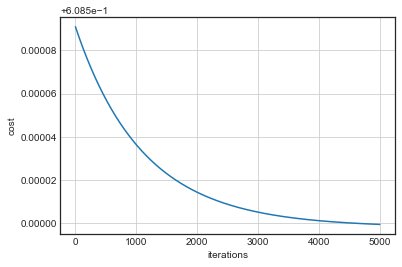

In [18]:
theta_r = lr_r(x, y, theta, 0.2 ,itr,0.1)

In [19]:
y_pred_r = sigmoid(np.dot(x, theta_r))

In [20]:
count=0
for i in range(len(y)):
    if(y_pred_r[i]>0.5 and y[i] == 1):
        count+=1
        continue
    if(y_pred_r[i]<=0.5 and y[i] == 0):
        count+=1        
print(count/len(y))

0.6979166666666666
